In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
import seaborn as sns

In [3]:
# 1. Cargar el dataset y seleccionar dos variables independientes
df = pd.read_csv("DataTitanic.csv")

x = df[['Pclass', 'Age']].values.reshape((-1,2))  # Por ejemplo, clase del pasajero y edad
y = df['Survived'].values.reshape((-1,1))


In [4]:
# 2. Mostrar porcentaje de datos inválidos
invalid_data_percentage = df.isnull().sum() / len(df) * 100
print("Porcentaje de datos inválidos:")
print(invalid_data_percentage)

Porcentaje de datos inválidos:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [5]:
# Manejo de valores nulos
imputer = SimpleImputer(strategy='median')
x[:, 1] = imputer.fit_transform(x[:, 1].reshape(-1, 1)).flatten()

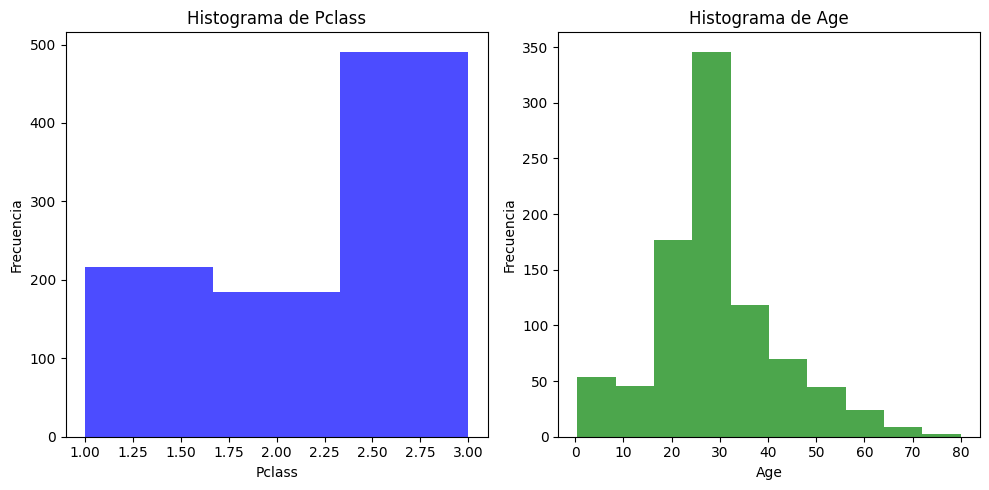

In [6]:
# 3. Graficar histogramas con matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(x[:, 0], bins=3, color='blue', alpha=0.7) 
plt.xlabel('Pclass')
plt.ylabel('Frecuencia')
plt.title('Histograma de Pclass')

plt.subplot(1, 2, 2)
plt.hist(x[:, 1], bins=10, color='green', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frecuencia')
plt.title('Histograma de Age')

plt.tight_layout()
plt.show()

In [7]:
# 4. Dividir en entrenamiento y prueba (80%-20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
# 5. Entrenar el modelo de regresión logística
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [9]:
# 6. Evaluar el modelo
y_pred_train = logistic_model.predict(x_train)
y_pred_test = logistic_model.predict(x_test)

r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)

print(f"R^2 Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")

R^2 Score: -0.0136
MAE: 0.2458
MSE: 0.2458


In [10]:
# 7. Obtener intercepto y pendientes
print("Intercepto del modelo:", logistic_model.intercept_)
print("Pendientes del modelo (coeficientes):", logistic_model.coef_)

Intercepto del modelo: [2.64722617]
Pendientes del modelo (coeficientes): [[-0.99026077 -0.03079509]]


/var/folders/t1/2ktpt7bs5xj266xv3kc5xyyc0000gn/T/ipykernel_24606/686836861.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


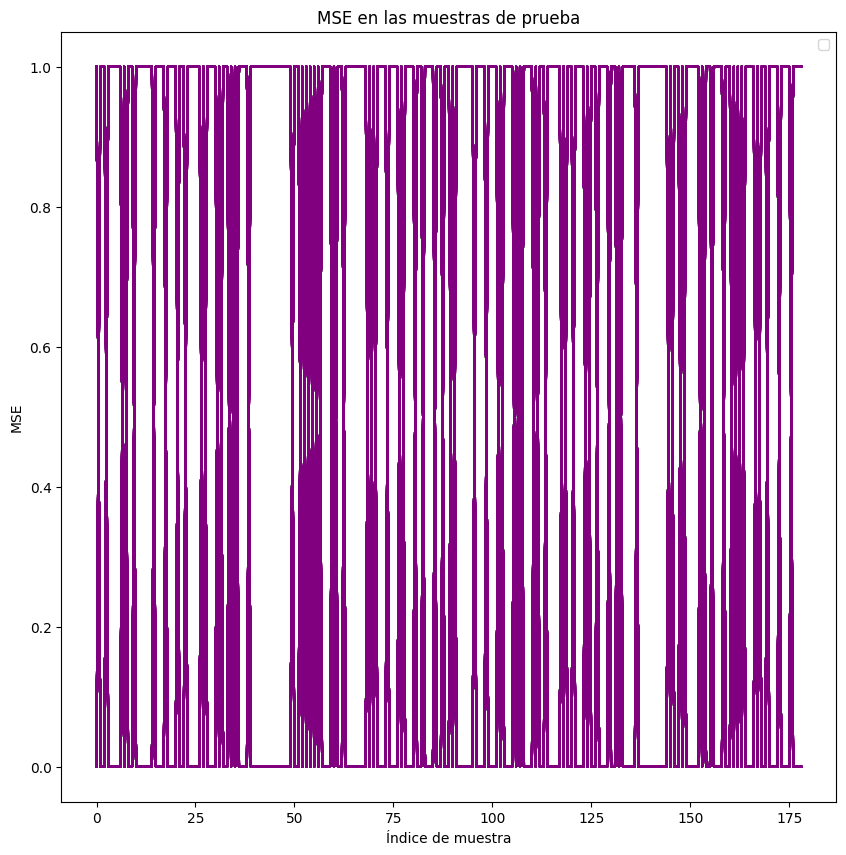

In [ ]:
# 8. Graficar el MSE para cada muestra del conjunto de prueba
errors = (y_test - y_pred_test) ** 2
plt.figure()
plt.plot(range(len(errors)), errors, color='purple')
plt.xlabel("Índice de muestra")
plt.ylabel("MSE")
plt.title("MSE en las muestras de prueba")
plt.legend()
plt.show()

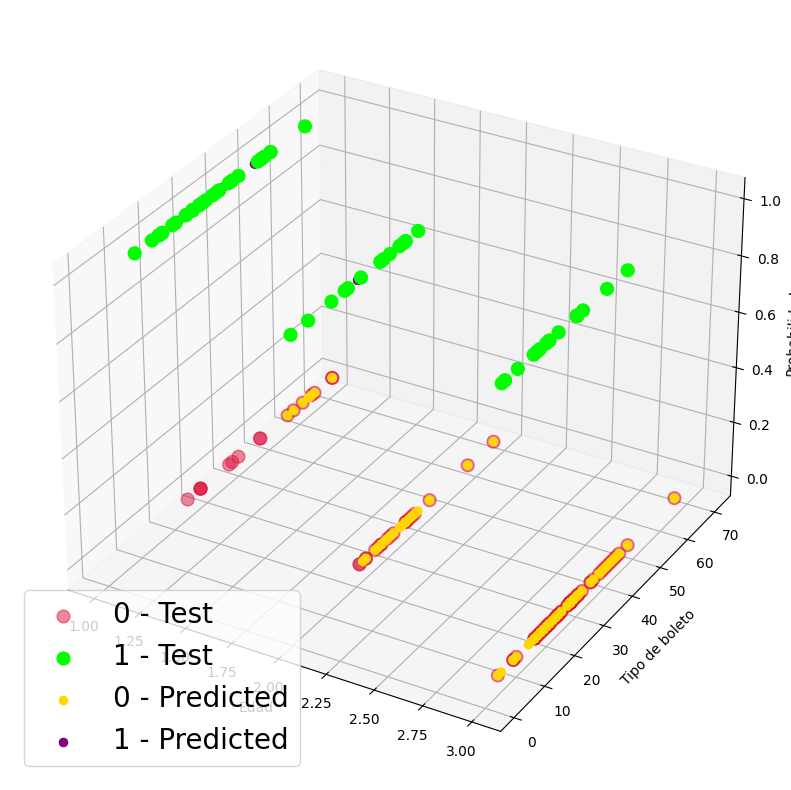

In [13]:
# 9. Graficar datos reales vs predicción

fig = plt.figure()
plt.rcParams['figure.figsize'] = (10,10)
ax = fig.add_subplot(111, projection='3d')
# Print class 0 of y test  #
ax.scatter(x_test[np.where(y_test == 0)[0],0], x_test[np.where(y_test == 0)[0],1], 0, s=85, c='crimson', alpha=0.5, label = "0 - Test")
# Print class 1 of y test #
ax.scatter(x_test[np.where(y_test == 1)[0],0], x_test[np.where(y_test == 1)[0],1], 1, s=85, c='lime', alpha=1, label = "1 - Test")
# Print class 0 of y predicted  #
ax.scatter(x_test[np.where(y_pred_test == 0)[0],0], x_test[np.where(y_pred_test == 0)[0],1], 0, s=35, c='gold', alpha=1, label = "0 - Predicted")
# Print class 1 of y predictet #
ax.scatter(x_test[np.where(y_pred_test == 1)[0],0], x_test[np.where(y_pred_test == 1)[0],1], 1, s=35, c='purple', alpha=1, label = "1 - Predicted")
ax.set_xlabel("Edad")
ax.set_ylabel("Tipo de boleto")
ax.set_zlabel("Probabilidad")
plt.legend(fontsize=20, loc="lower left")
plt.show()